In [2]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 35.0 MB/s eta 0:00:00:00:010:01


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

In [2]:
apple = yf.Ticker('AAPL').history(period = 'max')

In [3]:
apple.shape

(10585, 7)

In [4]:
apple.to_csv('apple_data.csv')

<AxesSubplot: xlabel='Date'>

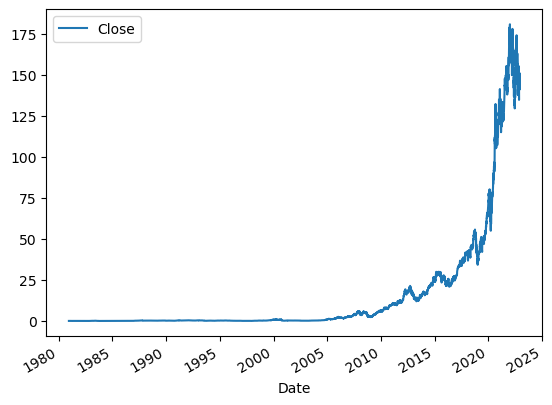

In [5]:
apple.plot.line(y='Close', use_index = True)

we’ll identify a target that we’re trying to predict. Our target will be if the price will go up or down tomorrow. If the price went up, the target will be 1, and if it went down, the target will be 0.

In [6]:
apple['Target'] = apple.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])['Close']

In [7]:
apple.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
Date,,,,,,,,
1980-12-12 00:00:00-05:00,0.099874,0.100308,0.099874,0.099874,469033600,0.0,0.0,NaN
1980-12-15 00:00:00-05:00,0.095098,0.095098,0.094663,0.094663,175884800,0.0,0.0,0.0
1980-12-16 00:00:00-05:00,0.088149,0.088149,0.087715,0.087715,105728000,0.0,0.0,0.0
1980-12-17 00:00:00-05:00,0.089886,0.090321,0.089886,0.089886,86441600,0.0,0.0,1.0
1980-12-18 00:00:00-05:00,0.092492,0.092926,0.092492,0.092492,73449600,0.0,0.0,1.0


In [8]:
# shift stock prices by one day so we are predicting
apple_prev = apple.copy().shift(1)

In [9]:
apple_prev.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
Date,,,,,,,,
1980-12-12 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15 00:00:00-05:00,0.099874,0.100308,0.099874,0.099874,469033600.0,0.0,0.0,NaN
1980-12-16 00:00:00-05:00,0.095098,0.095098,0.094663,0.094663,175884800.0,0.0,0.0,0.0
1980-12-17 00:00:00-05:00,0.088149,0.088149,0.087715,0.087715,105728000.0,0.0,0.0,0.0
1980-12-18 00:00:00-05:00,0.089886,0.090321,0.089886,0.089886,86441600.0,0.0,0.0,1.0


In [41]:
x = apple.iloc[1:,[0,1,2,3,4]]
y = apple.iloc[1:, [7]]

In [42]:
x

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-15 00:00:00-05:00,0.095098,0.095098,0.094663,0.094663,175884800
1980-12-16 00:00:00-05:00,0.088149,0.088149,0.087715,0.087715,105728000
1980-12-17 00:00:00-05:00,0.089886,0.090321,0.089886,0.089886,86441600
1980-12-18 00:00:00-05:00,0.092492,0.092926,0.092492,0.092492,73449600
1980-12-19 00:00:00-05:00,0.098137,0.098571,0.098137,0.098137,48630400
...,...,...,...,...,...
2022-11-29 00:00:00-05:00,144.289993,144.809998,140.350006,141.169998,83763800
2022-11-30 00:00:00-05:00,141.399994,148.720001,140.550003,148.029999,111224400
2022-12-01 00:00:00-05:00,148.210007,149.130005,146.610001,148.309998,71250400


In [43]:
y.head()

,Target
Date,
1980-12-15 00:00:00-05:00,0.0
1980-12-16 00:00:00-05:00,0.0
1980-12-17 00:00:00-05:00,1.0
1980-12-18 00:00:00-05:00,1.0
1980-12-19 00:00:00-05:00,1.0


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
model_random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 200)

In [56]:
model_random_forest.fit(x_train, y_train)

/tmp/ipykernel_1343/3984102567.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest.fit(x_train, y_train)


RandomForestClassifier(min_samples_split=200)

In [57]:
y_pred = model_random_forest.predict(x_test)

In [58]:
from sklearn.metrics import precision_score

In [59]:
score = precision_score(y_pred, y_test)

In [60]:
score

0.6148432501599488